# 🧹 Data Cleaning and Exploratory Analysis

In this notebook, we'll dive deep into the candidate data, cleaning it, analyzing patterns, and preparing it for further use.

## 🚀 Steps Overview

1. **Database Connection** 🔗
2. **Exploratory Data Analysis (EDA)** 📊
3. **Data Cleaning and Transformation** 🧼



---

## 1. 🔗 Database Connection

We start by connecting to the PostgreSQL database to retrieve the raw data for analysis.



In [8]:
# Una sola celda para todas las importaciones
import sys
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
work_dir = os.getenv('WORK_DIR')

# Ensure the working directory is in sys.path
sys.path.append(work_dir)

from src.model import CandidatesRaw, CandidatesTransformed
from sqlalchemy import inspect
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
from sqlalchemy.exc import SQLAlchemyError

from src.db_connection import build_engine
from src.transform_data import DataTransformer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Connect to the database
engine = build_engine()
Session = sessionmaker(bind=engine)
session = Session()

Successfully connected to the database postgres!


**Loading the Data from the Database:**

In [10]:
base = declarative_base()
table = aliased(CandidatesRaw)

In [11]:
query = session.query(table).statement
df = pd.read_sql(query, engine)

---
## 2. 📊 Exploratory Data Analysis (EDA)
Here, we explore the dataset to understand its structure, identify any inconsistencies, and visualize key patterns.

| **Field**                  | **Description**                                                                        |
|----------------------------|----------------------------------------------------------------------------------------|
| `ID`                       | A unique identifier for each candidate.                                                |
| `First_Name`               | The candidate's first name.                                                            |
| `Last_Name`                | The candidate's last name.                                                             |
| `Email`                    | The email address of the candidate.                                                    |
| `Country`                  | The country where the candidate is located.                                            |
| `Application_Date`         | The date when the candidate submitted their application.                               |
| `YOE (Years of Experience)`| The number of years of professional experience the candidate has.                      |
| `Seniority`                | The candidate's level of seniority (e.g., Junior, Mid, Senior).                        |
| `Technology`               | The primary technology or programming language the candidate specializes in.           |
| `Code_Challenge_Score`     | The score the candidate received on a coding challenge.                                |
| `Technical_Interview_Score`| The score the candidate received during a technical interview.                         |


**Initial Data Review:**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         50000 non-null  int64 
 1   First_Name                 50000 non-null  object
 2   Last_Name                  50000 non-null  object
 3   Email                      50000 non-null  object
 4   Application_Date           50000 non-null  object
 5   Country                    50000 non-null  object
 6   YOE                        50000 non-null  int64 
 7   Seniority                  50000 non-null  object
 8   Technology                 50000 non-null  object
 9   Code_Challenge_Score       50000 non-null  int64 
 10  Technical_Interview_Score  50000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 4.2+ MB


In [12]:
df.describe()

,ID,YOE,Code_Challenge_Score,Technical_Interview_Score
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,15.286980,4.996400,5.003880
std,14433.901067,8.830652,3.166896,3.165082
min,1.000000,0.000000,0.000000,0.000000
25%,12500.750000,8.000000,2.000000,2.000000
50%,25000.500000,15.000000,5.000000,5.000000
75%,37500.250000,23.000000,8.000000,8.000000
max,50000.000000,30.000000,10.000000,10.000000


**Identification of Missing and Duplicate Values:**

In [14]:
# Contar valores nulos por columna
missing_values = df.isnull().sum()
print(missing_values)

# Verificar filas duplicadas
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


ID                           0
First_Name                   0
Last_Name                    0
Email                        0
Application_Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code_Challenge_Score         0
Technical_Interview_Score    0
dtype: int64
Number of duplicate rows: 0


**Analysis of Categorical and Numerical Variables:**

In [15]:
# Variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical variables: {categorical_columns}")

# Variables numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical variables: {numerical_columns}")


Categorical variables: Index(['First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country',
       'Seniority', 'Technology'],
      dtype='object')
Numerical variables: Index(['ID', 'YOE', 'Code_Challenge_Score', 'Technical_Interview_Score'], dtype='object')


**Calculate the Hired Column:**
- This code will create a new column Hired in your DataFrame, which will be 1 if the candidate scored 7 or more in both the Technical Interview and the Coding Challenge. Otherwise, it will be 0.

In [16]:
# Add the 'Hired' column based on the criteria
df['Hired'] = ((df['Technical_Interview_Score'] >= 7) & (df['Code_Challenge_Score'] >= 7)).astype(int)

# Show a preview to confirm the column was added correctly
df.head()


,ID,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1


In [72]:
# Define a rule of thumb for minimum YOE by Seniority level
seniority_rules = {
    'Intern': 0,
    'Junior': 1,
    'Mid-Level': 3,
    'Senior': 5,
    'Lead': 7,
    'Architect': 10
}

# Detect inconsistencies
df['Expected_YOE'] = df['Seniority'].map(seniority_rules)
inconsistent_seniority = df[df['YOE'] < df['Expected_YOE']]

# Display inconsistencies
print(f"Number of seniority inconsistencies: {len(inconsistent_seniority)}")
print(inconsistent_seniority[['First_Name', 'Last_Name', 'Email', 'Seniority', 'YOE', 'Expected_YOE']])


Number of seniority inconsistencies: 5446
      First_Name Last_Name                          Email  Seniority  YOE  \
7            Nya    Skiles       madisen.zulauf@gmail.com       Lead    1   
19          Adah    Pouros              derick1@gmail.com  Architect    3   
24         Shana    Kuphal         sydnie_hoppe@yahoo.com  Architect    3   
25        Marion   Ullrich    darius.gleason1@hotmail.com       Lead    6   
26        Dorian   Zboncak            kyleigh55@yahoo.com       Lead    5   
...          ...       ...                            ...        ...  ...   
49932      Alyce    Wehner       alberta_marvin@yahoo.com       Lead    4   
49951   Nickolas  Predovic               lynn96@gmail.com  Architect    1   
49956     Amalia    Erdman  marcelina_schneider@yahoo.com       Lead    5   
49969      Agnes      Auer     onie_leannon40@hotmail.com  Mid-Level    0   
49977      Timmy   Fritsch           ubaldo63@hotmail.com       Lead    0   

       Expected_YOE  
7          

In [71]:
# Detect duplicated emails
duplicated_emails = df[df.duplicated(subset='Email', keep=False)]

# Check for inconsistencies in duplicated emails
email_inconsistencies = duplicated_emails.groupby('Email').nunique()

# Filter to see where there are inconsistencies (more than 1 unique value for any column)
inconsistent_rows = email_inconsistencies[(email_inconsistencies > 1).any(axis=1)]

# Display inconsistencies
print(f"Number of email inconsistencies: {len(inconsistent_rows)}")
print(inconsistent_rows)


Number of email inconsistencies: 165
                          ID  First_Name  Last_Name  Application_Date  \
Email                                                                   
abbigail94@yahoo.com       2           2          2                 2   
addison_bode@hotmail.com   2           2          2                 2   
alberta95@gmail.com        2           2          2                 2   
alberto11@yahoo.com        2           2          2                 2   
alejandra17@hotmail.com    2           2          2                 2   
...                       ..         ...        ...               ...   
velva76@hotmail.com        2           2          2                 2   
vern44@hotmail.com         2           2          2                 2   
wilhelm76@hotmail.com      2           2          2                 2   
winston14@hotmail.com      2           2          2                 2   
zachery86@yahoo.com        2           2          2                 2   

             

 📧 **Email Inconsistencies**

- **Total Email Inconsistencies:** 165
- The analysis identified 165 instances where the same email address appears multiple times in the dataset. For each of these email addresses, all associated attributes (such as first name, last name, country, years of experience, and other details) also differ. This inconsistency is a clear indicator that the dataset is synthetic and lacks coherence. In real-world scenarios, the same email address should correspond to the same individual, and the details should be consistent across records. The inconsistencies suggest that the dataset has been randomly generated without maintaining logical consistency.

👔 **Seniority Inconsistencies**

- **Total Seniority Inconsistencies:** 5,446
- There are 5,446 instances where the years of experience (`YOE`) do not align with the expected seniority level. For example:
  - Candidates labeled as "Lead" with only 1 year of experience, where typically, a "Lead" role would require at least 7 years of experience.
  - Candidates labeled as "Architect" with only 3 years of experience, while such a senior role would typically require at least 10 years of experience.
  
These discrepancies further emphasize the randomness and synthetic nature of the dataset. In a real-world dataset, seniority levels should correspond to a candidate's years of experience, and any deviations from this norm would be rare and would likely require special justification.

---

**Identifying Outliers with a Box Plot:**
Outliers can be identified visually using a box plot (also known as a box-and-whisker plot). This type of plot displays the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Outliers are often represented as individual points beyond the "whiskers" of the plot.

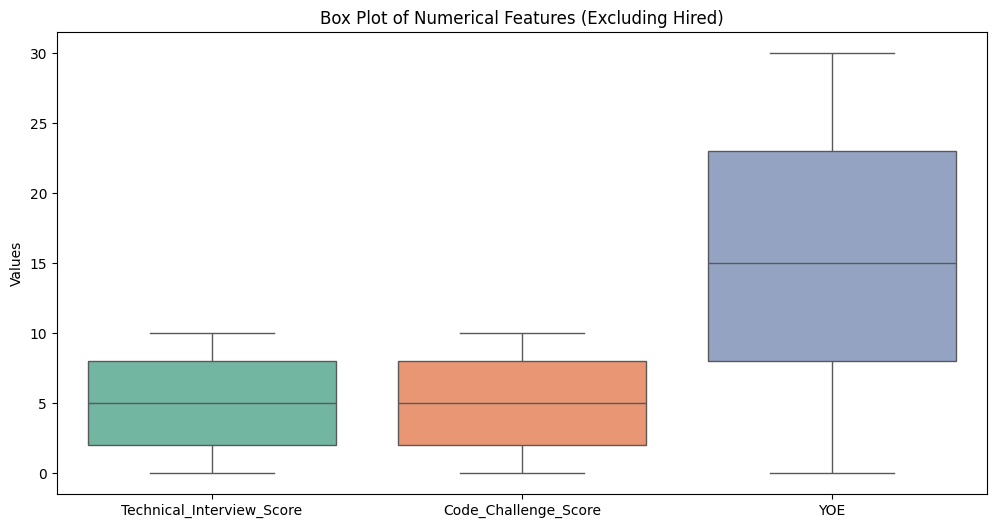

In [22]:
# Select numerical columns excluding 'Hired' and 'ID'
numerical_columns = ['Technical_Interview_Score', 'Code_Challenge_Score', 'YOE']

# Create a box plot for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], palette='Set2')
plt.title('Box Plot of Numerical Features (Excluding Hired)')
plt.ylabel('Values')
plt.show()

**Correlation Matrix Without the ID Column:**
- Correlation analysis helps in understanding the relationships between numerical variables. A correlation matrix is often visualized using a heatmap, where colors indicate the strength of the correlation.

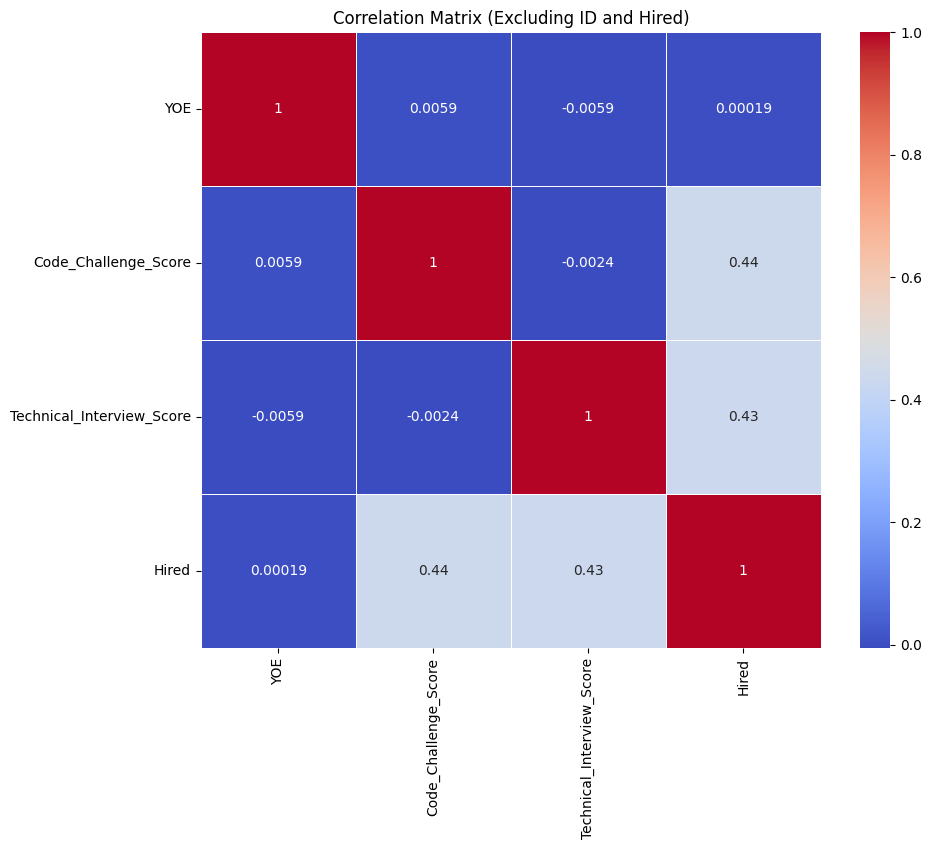

In [24]:
# Seleccionar solo las columnas numéricas excluyendo 'ID' y 'Hired'
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Excluding ID and Hired)')
plt.show()


**The correlation matrix reveals a few key insights, even though the dataset is synthetic and the results are random:**

- Moderate Positive Correlation: The Code_Challenge_Score and Technical_Interview_Score both show moderate positive correlations with the Hired variable (0.44 and 0.43, respectively). This suggests that higher scores in these areas are associated with a higher likelihood of being hired.

- Minimal Influence of Experience: The YOE (Years of Experience) variable shows almost no correlation with the other variables, indicating that experience does not significantly impact technical interview scores or the hiring decision in this dataset.

- These findings, while informative, should be interpreted with caution given the synthetic nature of the data. The correlations might not reflect real-world scenarios accurately.

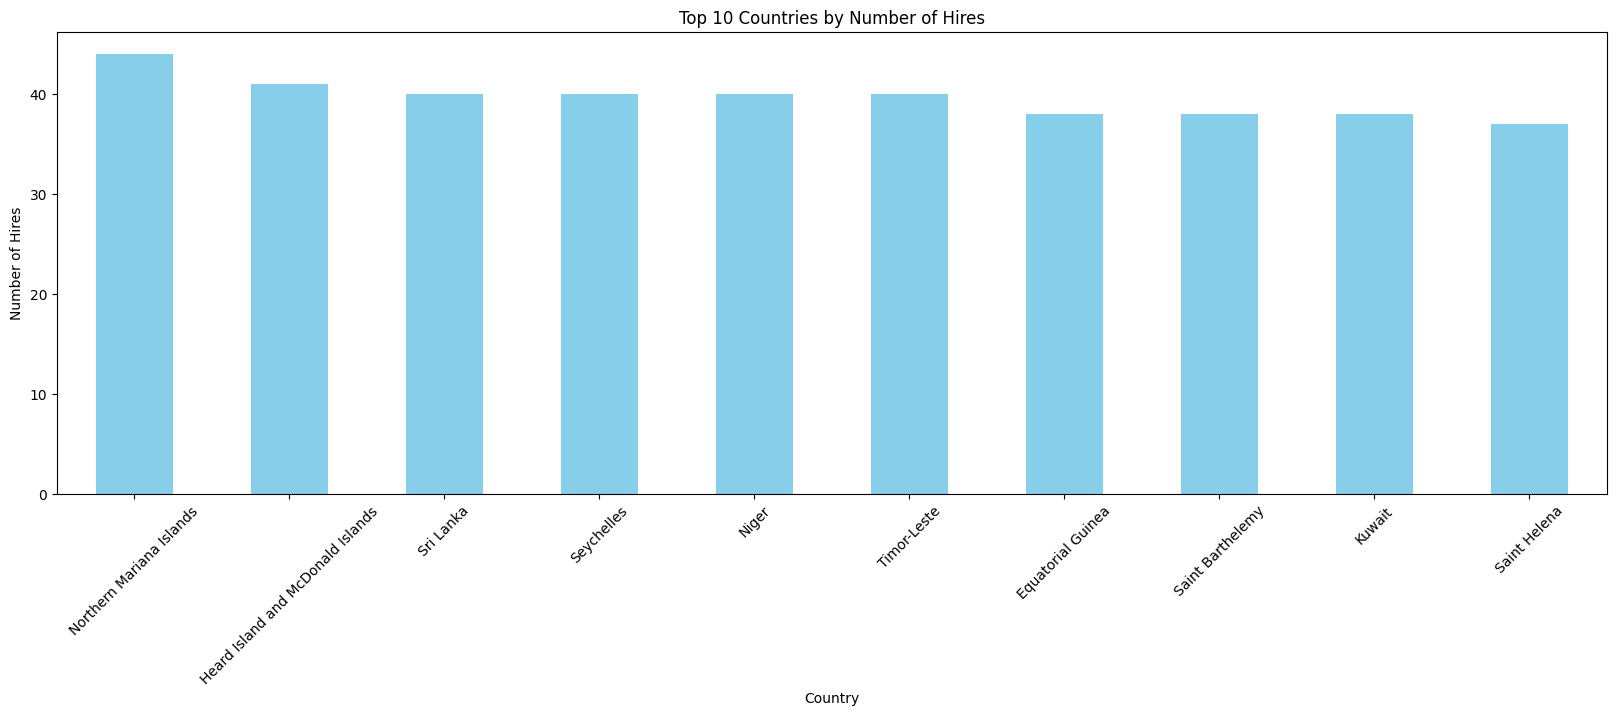

In [29]:
hired_by_country = df[df['Hired'] == 1]['Country'].value_counts().head(10)

plt.figure(figsize=(20, 6))
hired_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Hires')
plt.xlabel('Country')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.show()


- The bar chart displays the top 10 countries by the number of hires. Notably, the Northern Mariana Islands lead the chart with the highest number of hires, followed closely by Heard Island and McDonald Islands and Sri Lanka. The data suggests that these countries are more likely to hire candidates, at least according to this dataset.

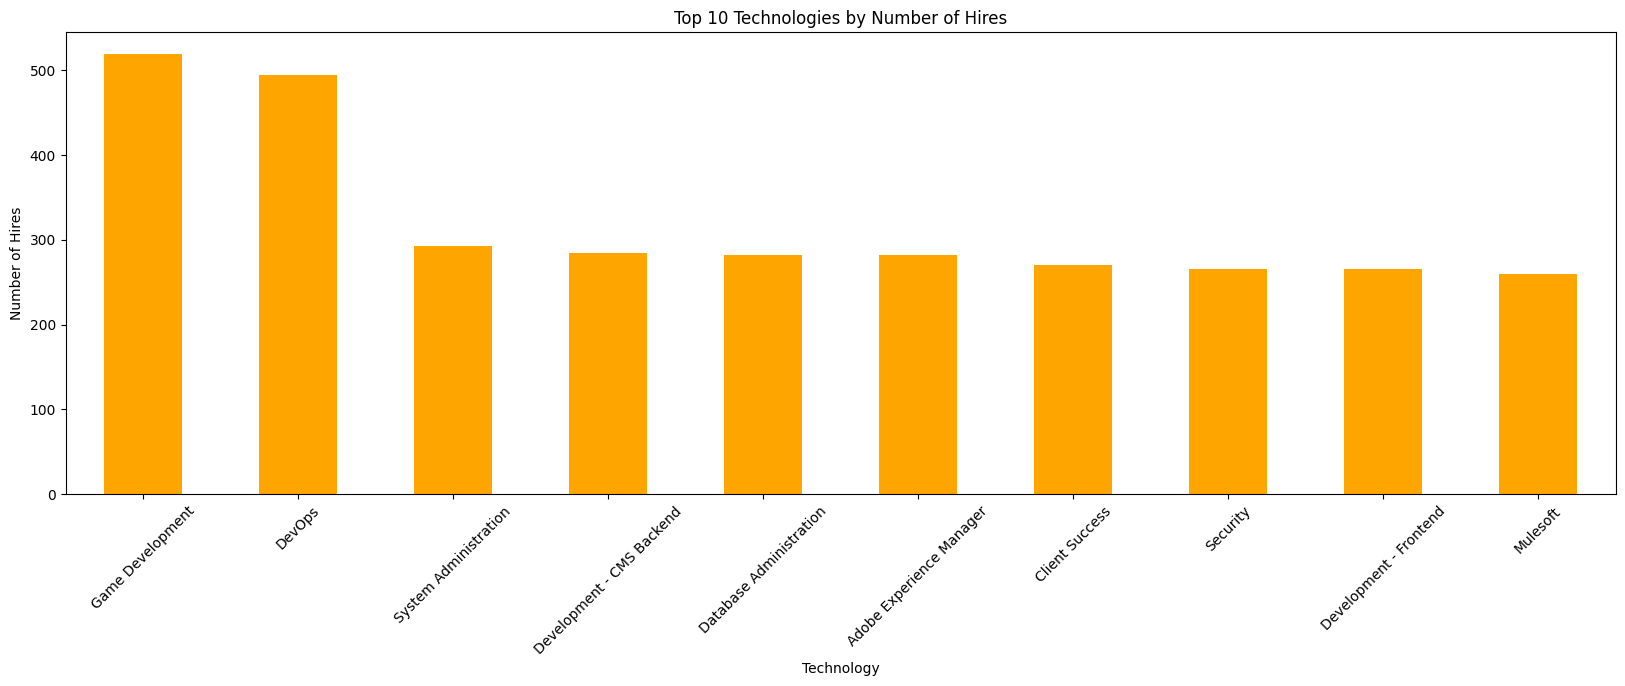

In [31]:
hired_by_technology = df[df['Hired'] == 1]['Technology'].value_counts().head(10)

plt.figure(figsize=(20, 6))
hired_by_technology.plot(kind='bar', color='orange')
plt.title('Top 10 Technologies by Number of Hires')
plt.xlabel('Technology')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.show()


- This bar chart highlights the top 10 technologies by the number of hires. Game Development leads as the most hired technology, followed closely by DevOps and System Administration.



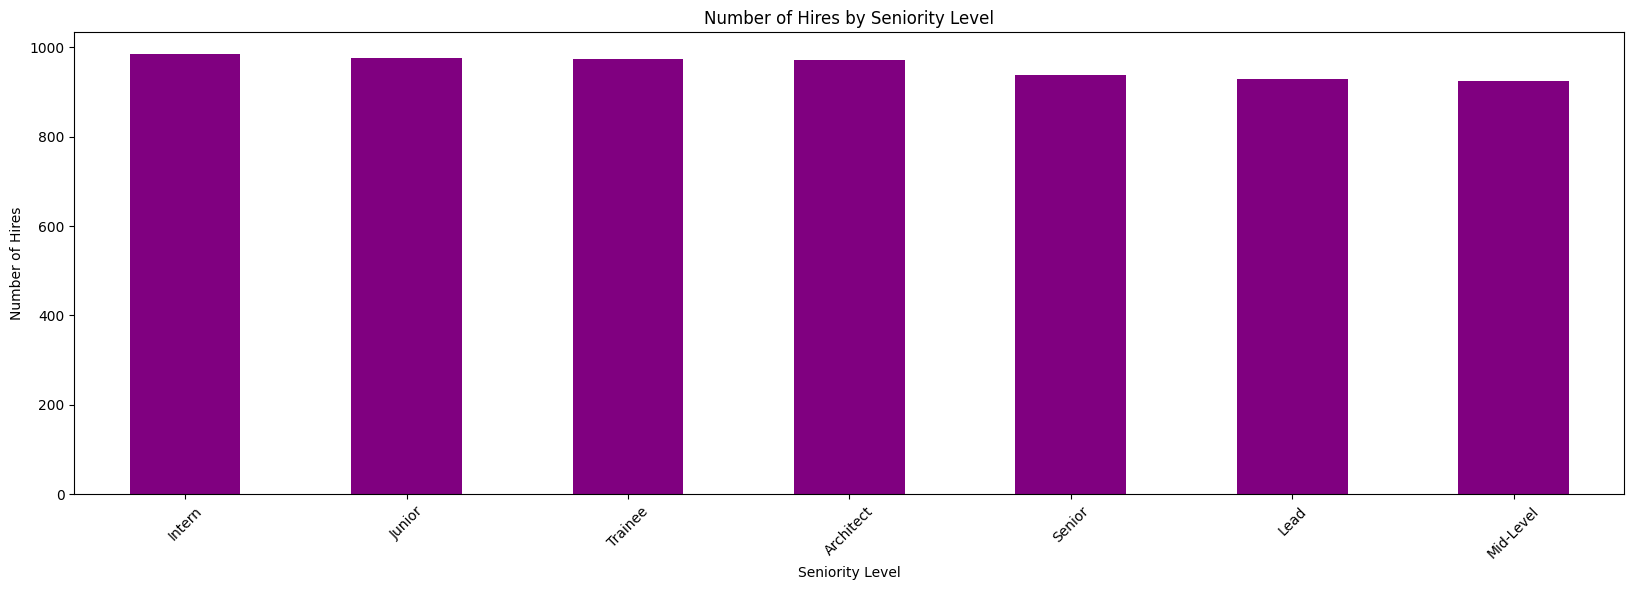

In [36]:
hired_by_seniority = df[df['Hired'] == 1]['Seniority'].value_counts()

plt.figure(figsize=(20, 6))
hired_by_seniority.plot(kind='bar', color='purple')
plt.title('Number of Hires by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.show()


- This bar chart represents the number of hires by seniority level. The dataset shows an even distribution of hires across different seniority levels, with each level having around 1000 hires. This suggests that in this synthetic dataset, the organization is hiring across all levels of experience—from interns to senior roles—with no particular bias towards any single seniority level.



1. **Hires by Technology (Pie Chart)**
* This chart will show the distribution of hires across different technologies.

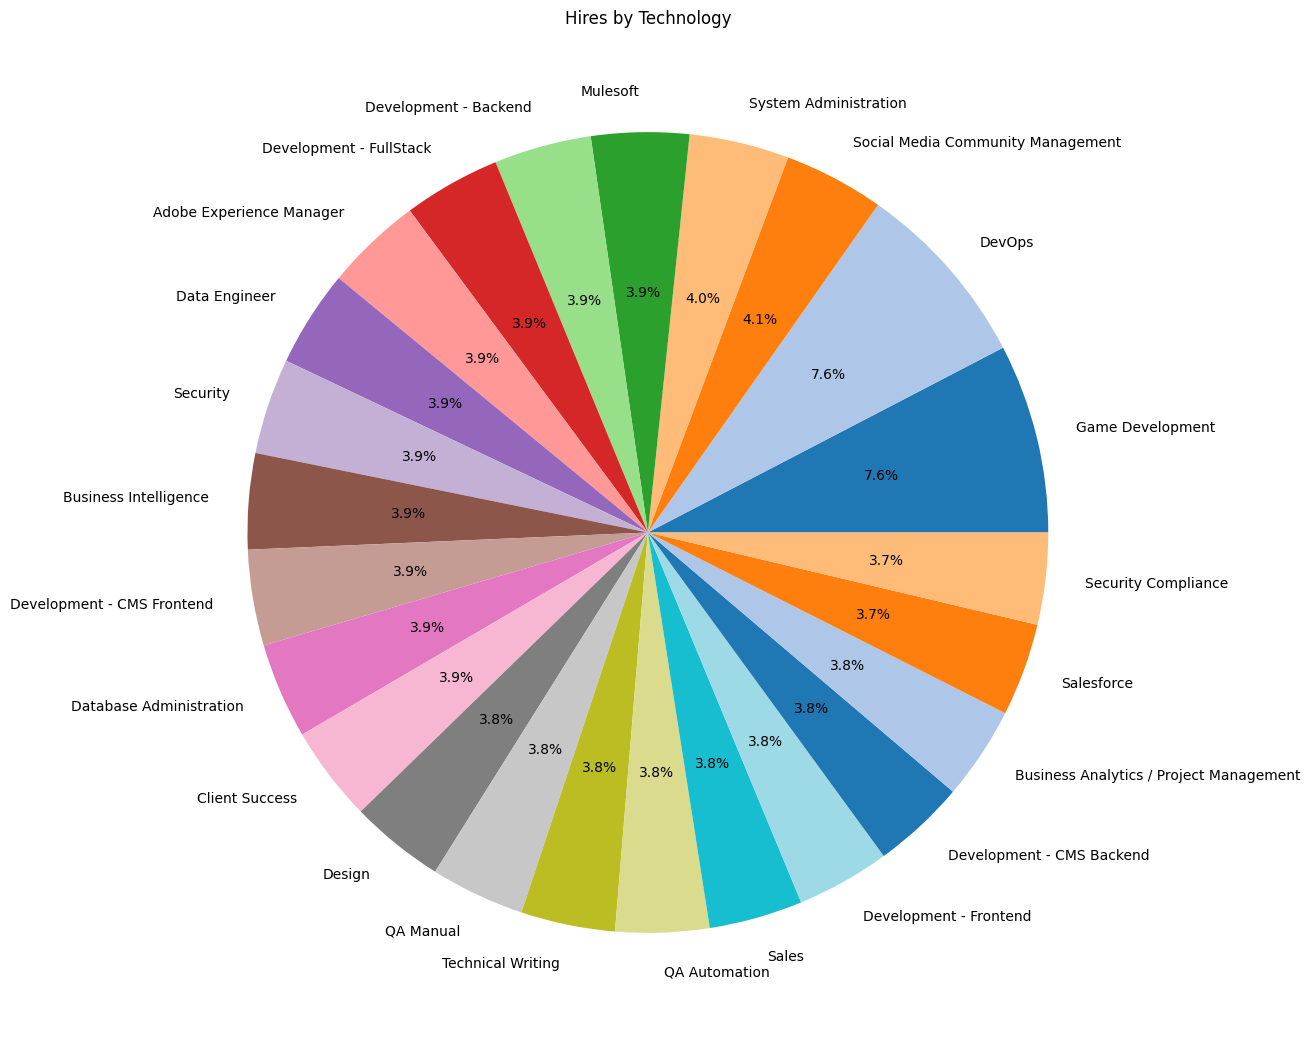

In [42]:
# Pie chart for hires by technology
technology_counts = df['Technology'].value_counts()

plt.figure(figsize=(25, 13))
plt.pie(technology_counts, labels=technology_counts.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Hires by Technology')
plt.show()


**Key Observations:**

- Game Development and DevOps are the leading technologies, each accounting for 7.6% of total hires, indicating high demand in these areas.
- Other technologies such as System Administration, Development - CMS Backend, and Salesforce have similar hiring proportions, suggesting a balanced need across different technological fields.
- The wide variety of technologies represented in the chart highlights the diversity in hiring preferences, with no single technology overwhelmingly dominating the hiring landscape.

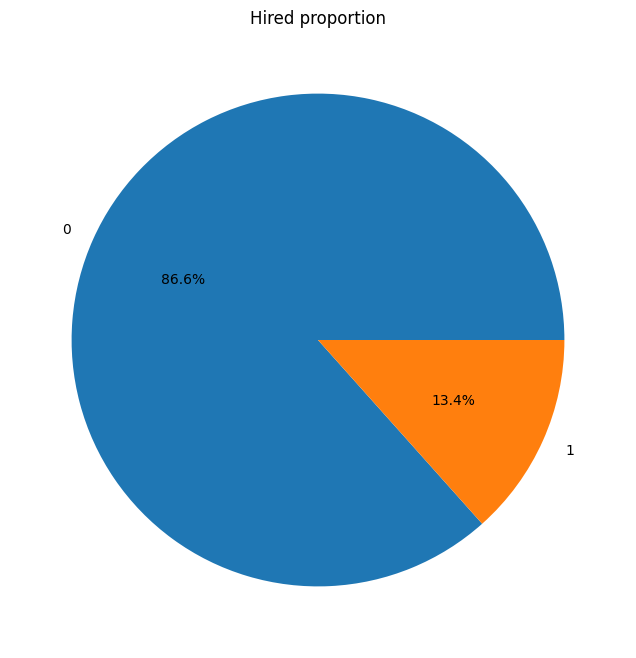

In [50]:
hired_count = df['Hired'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(hired_count, labels=hired_count.index, autopct='%1.1f%%')
plt.title('Hired proportion')
plt.show()

**The pie chart you've provided illustrates the proportion of candidates who were hired (1) versus those who were not hired (0).**
- 13.4% of candidates were successfully hired, while 86.6% were not.
- This indicates that a relatively small portion of the candidate pool met the hiring criteria, which could suggest stringent requirements or highly competitive positions.
- The chart emphasizes the importance of the selection process, with a significant majority of candidates not meeting the necessary standards.

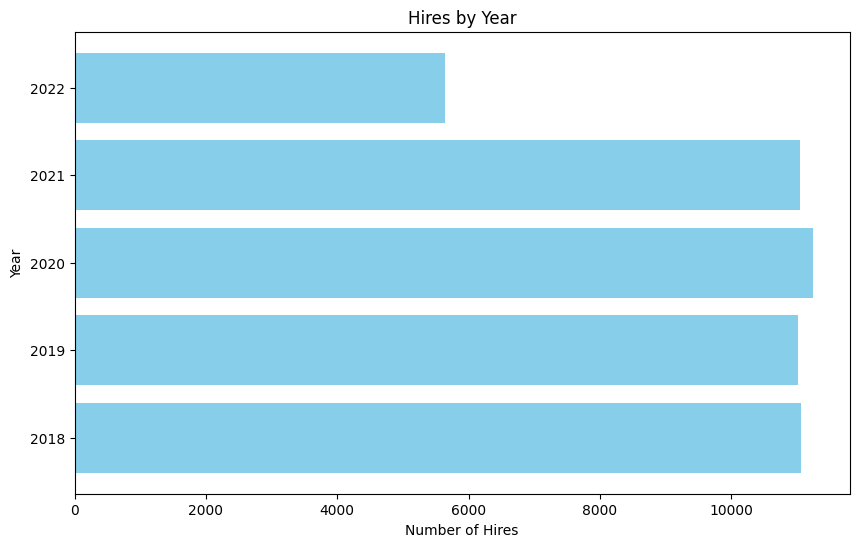

In [51]:
# Bar chart for hires by year
df['Application_Date'] = pd.to_datetime(df['Application_Date'])
df['Year'] = df['Application_Date'].dt.year
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.barh(year_counts.index, year_counts.values, color='skyblue')
plt.title('Hires by Year')
plt.xlabel('Number of Hires')
plt.ylabel('Year')
plt.show()


**Key Observations:**
- 2021 was the year with the highest number of hires, followed closely by 2020, 2019, and 2018.
- 2022 shows a noticeable drop in the number of hires compared to the previous years. This could indicate a shift in hiring strategies, possibly due to changes in economic conditions, organizational needs, or other external factors.
- The consistent hiring numbers from 2018 to 2021 suggest stability in recruitment during these years, while the decline in 2022 could be a point of interest for further investigation.

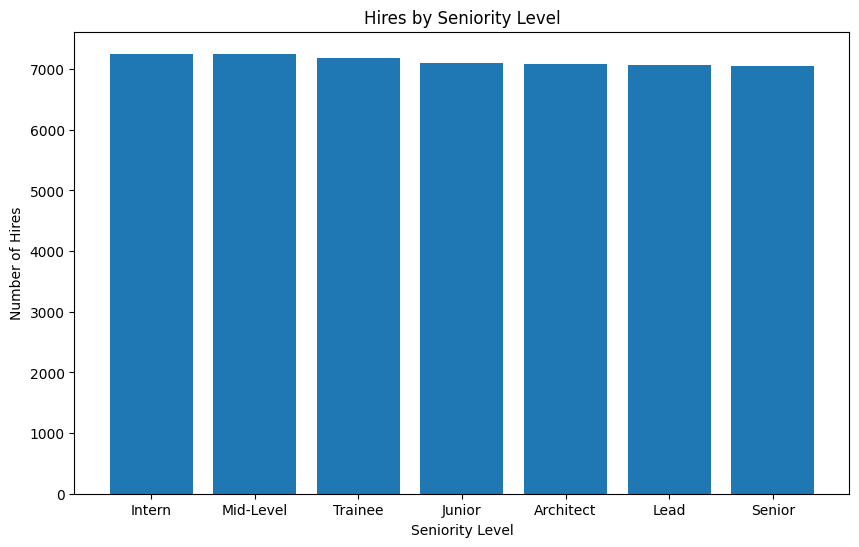

In [58]:
# Bar chart for hires by seniority
seniority_counts = df['Seniority'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(seniority_counts.index, seniority_counts.values)
plt.title('Hires by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Hires')
plt.show()


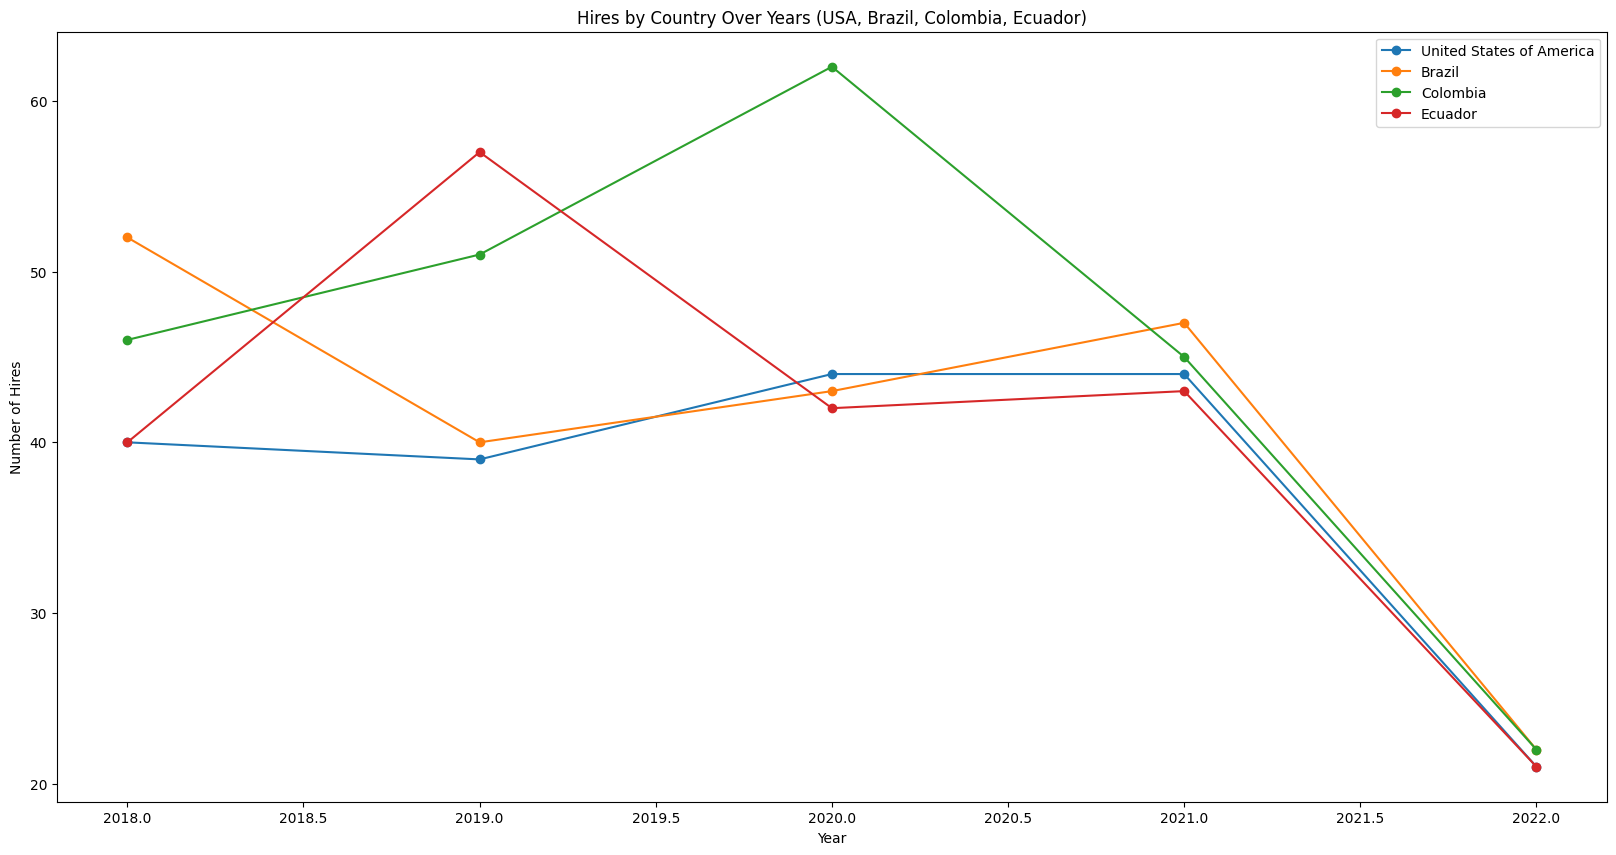

In [61]:
# Multiline chart for hires by country over years
countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
df_filtered = df[df['Country'].isin(countries)]
df_grouped = df_filtered.groupby(['Year', 'Country']).size().unstack().fillna(0)

plt.figure(figsize=(20, 10))
for country in countries:
    plt.plot(df_grouped.index, df_grouped[country], marker='o', label=country)

plt.title('Hires by Country Over Years (USA, Brazil, Colombia, Ecuador)')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.legend()
plt.show()


**Key Observations:**
- **Colombia** showed a strong increase in hires, peaking around 2021, before a significant drop in 2022.
- **Brazil** also displayed a generally increasing trend in hires up until 2021, followed by a sharp decline in 2022.
- **Ecuador** had a significant spike in hires around 2019-2020, followed by a gradual decline.
- **The United States** had a relatively stable number of hires throughout the years, with a slight decrease towards 2022.

**Interpretation:**
This chart highlights regional differences in hiring trends over the years. The significant decline in hires across all four countries in 2022 might suggest broader external factors affecting recruitment, such as economic conditions, changes in company strategies, or the impact of global events like the pandemic. Colombia and Brazil were particularly active in hiring until 2021, after which they saw a sharp drop, which warrants further investigation into the causes.

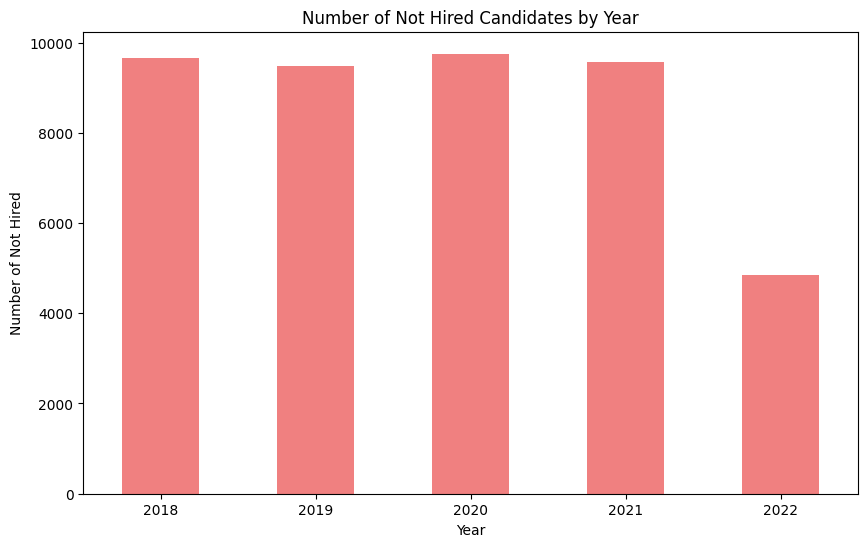

In [62]:
df['Year'] = pd.to_datetime(df['Application_Date']).dt.year

# Filter the data for 'Not Hired' candidates
not_hired_df = df[df['Hired'] == 0]

# Group by 'Year' and count the number of 'Not Hired' candidates
not_hired_by_year = not_hired_df.groupby('Year').size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
not_hired_by_year.plot(kind='bar', color='lightcoral')
plt.title('Number of Not Hired Candidates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Not Hired')
plt.xticks(rotation=0)
plt.show()

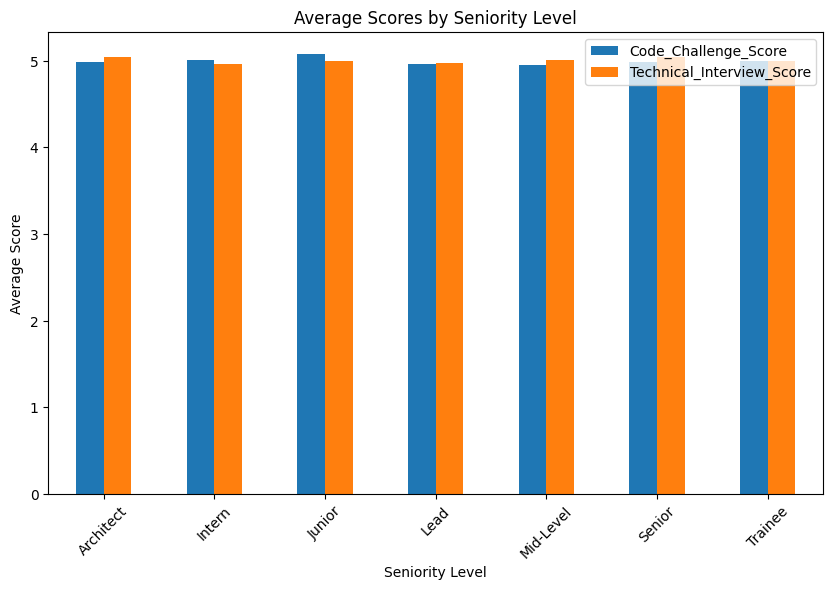

In [63]:
# Group by seniority level and calculate mean scores
avg_scores = df.groupby('Seniority')[['Code_Challenge_Score', 'Technical_Interview_Score']].mean()

# Plot the average scores
avg_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


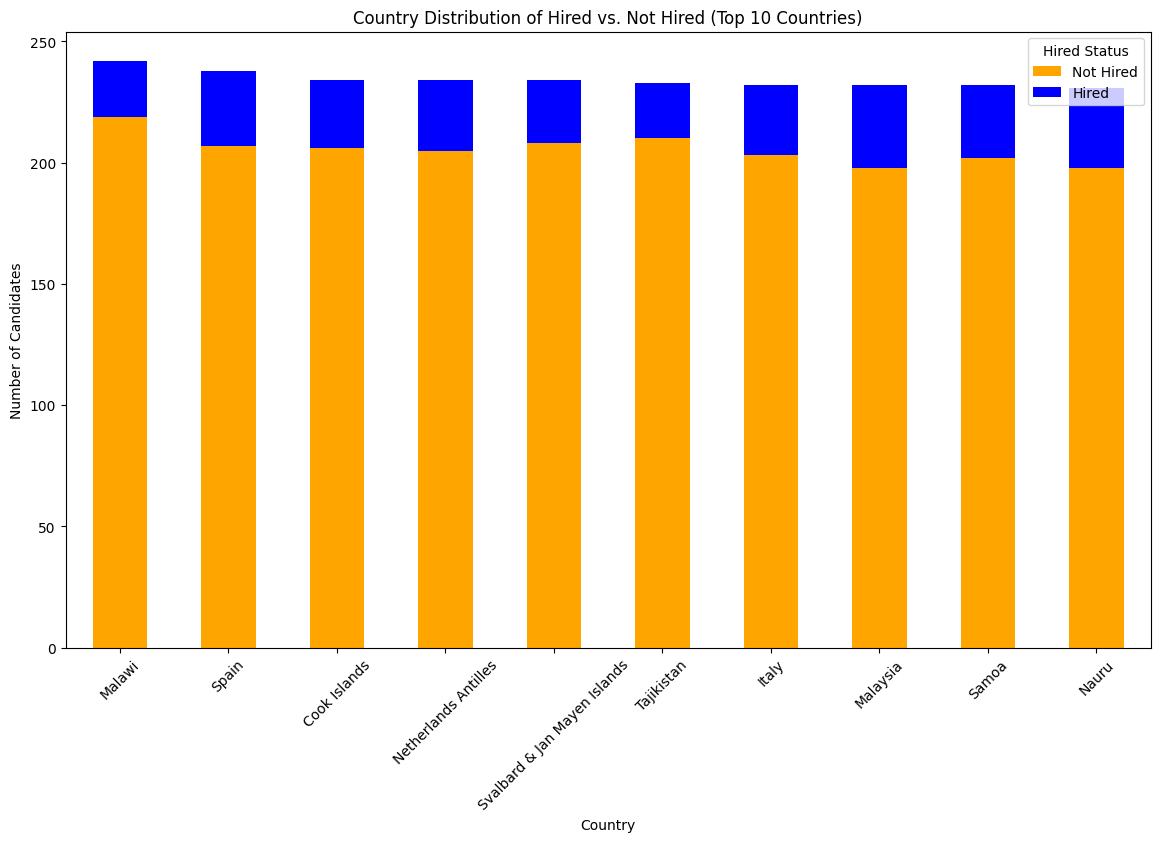

In [69]:
# Group by country and hired status, then count
country_hire_status = df.groupby(['Country', 'Hired']).size().unstack()

# Get the top 10 countries by the total number of candidates
top_10_countries = country_hire_status.sum(axis=1).nlargest(10).index
top_10_country_hire_status = country_hire_status.loc[top_10_countries]

# Plot the stacked bar chart for top 10 countries
top_10_country_hire_status.plot(kind='bar', stacked=True, figsize=(14, 8), color=['orange', 'blue'])
plt.title('Country Distribution of Hired vs. Not Hired (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.legend(title='Hired Status', loc='upper right', labels=['Not Hired', 'Hired'])
plt.show()
